In [1]:
import os
os.chdir("D:\Data\Jira02\Assets\Python\DigitalHuman-Speak")
import script.util.BotnoiUtil as bnu
import script.util.TextProcessingUtil as tpu
import script.util.VoiceProcessingUtil as vpu
import speech_recognition as sr
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
%matplotlib inline

In [2]:
PATH = "data/botnoi.wav"

In [ ]:
bnu.botnoi("ทายายาทาทายา")

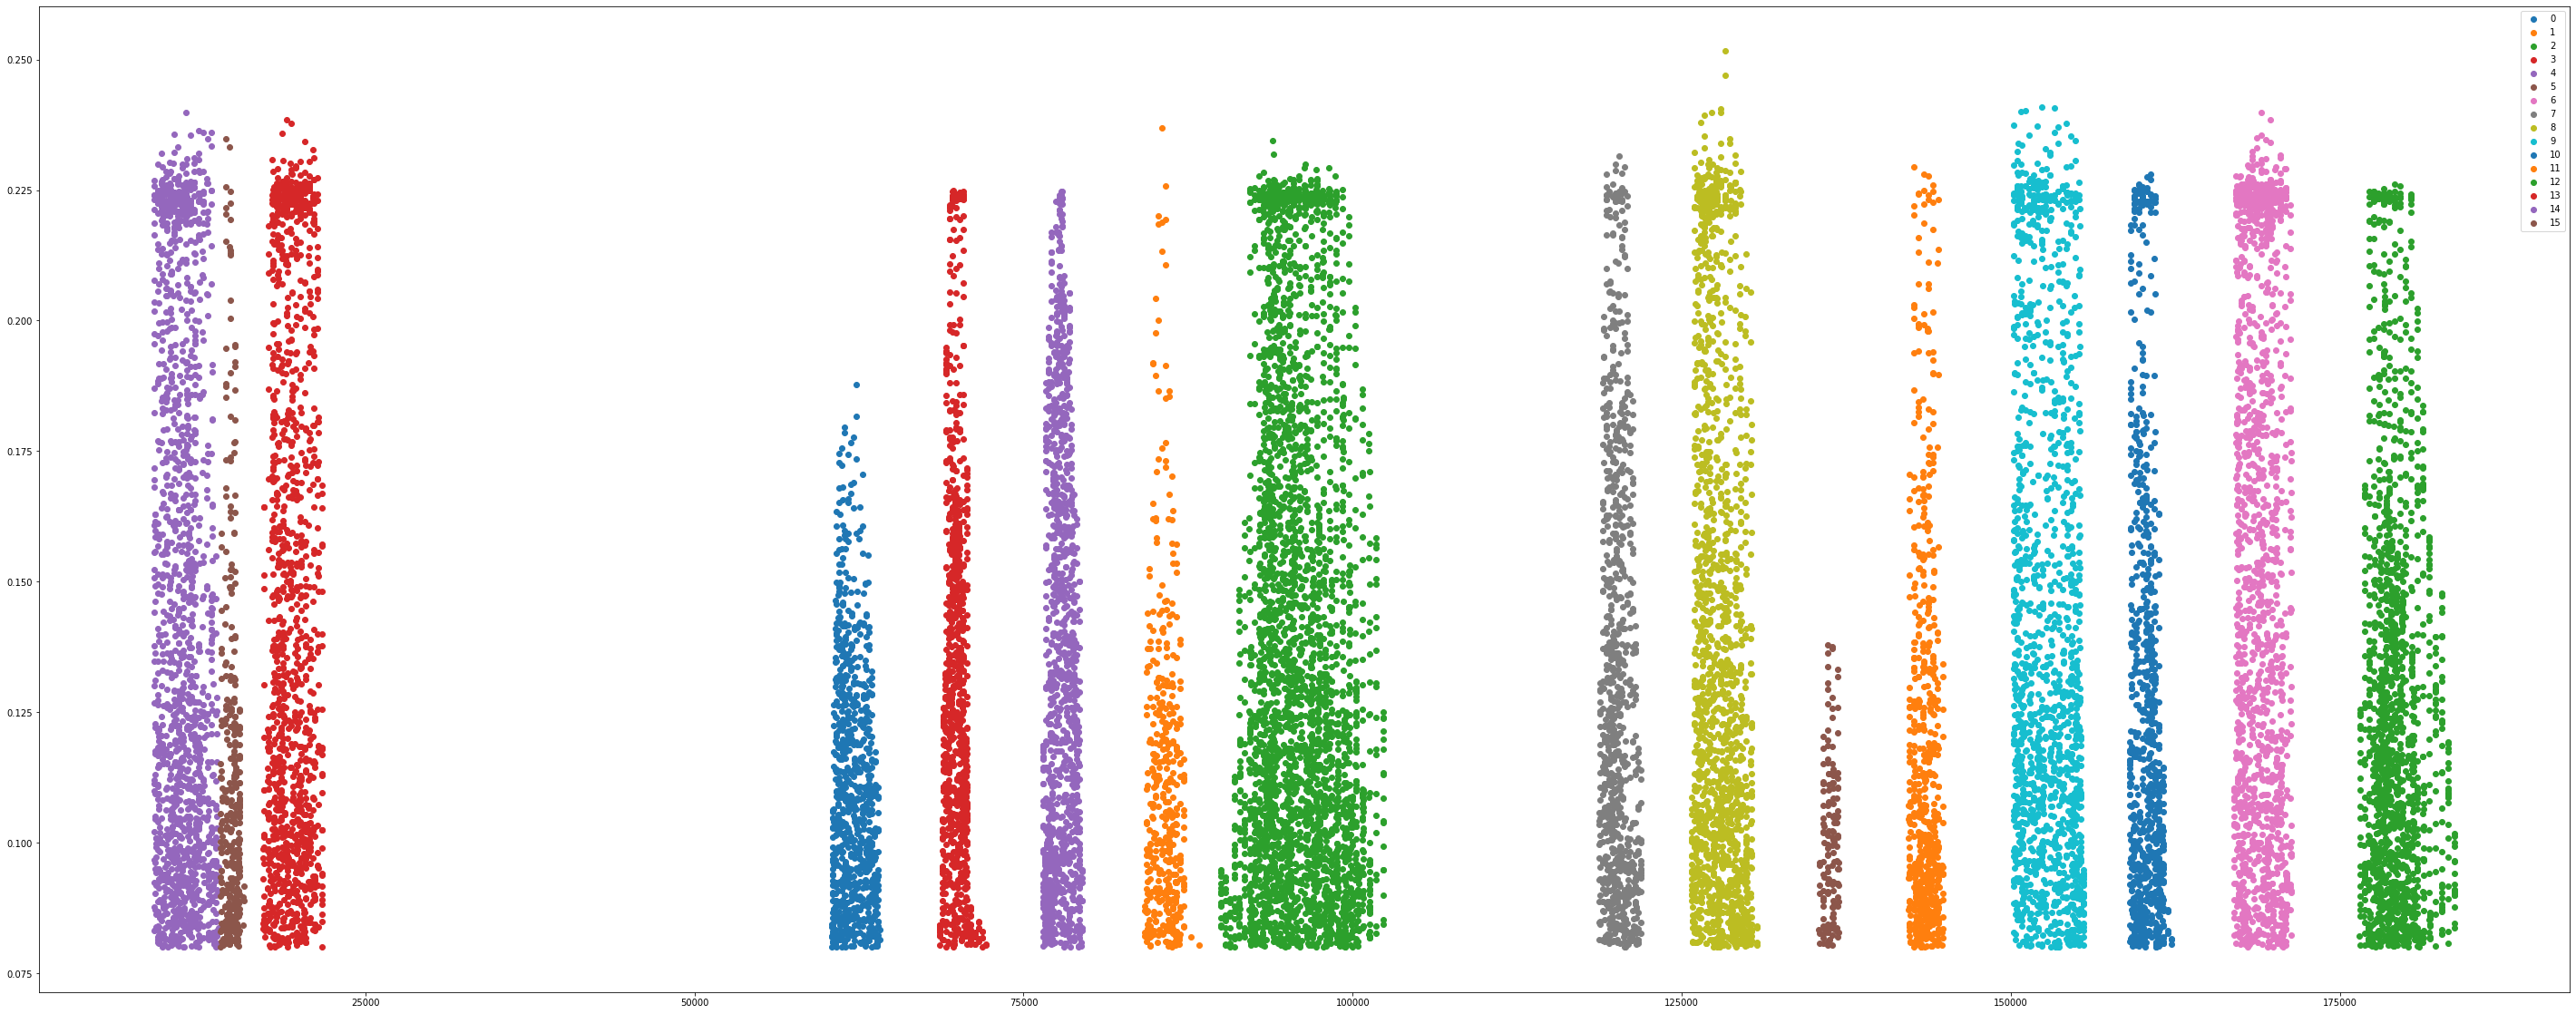

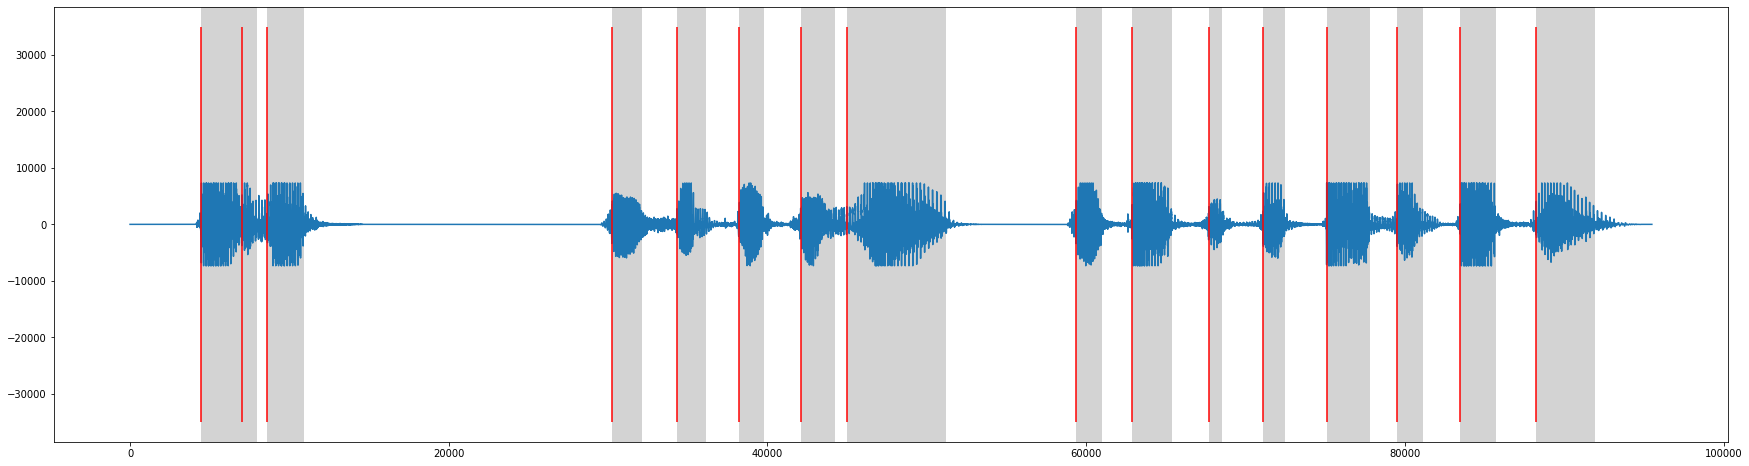

[[0.20267573696145125, 0.31471655328798187],
 [0.31761904761904763, 0.35714285714285715],
 [0.39120181405895693, 0.49272108843537415],
 [1.3708843537414965, 1.4537414965986395],
 [1.5564852607709752, 1.6362358276643991],
 [1.7340589569160998, 1.8009750566893423],
 [1.90859410430839, 2.0024716553287982],
 [2.0400680272108844, 2.3198185941043086],
 [2.6924943310657596, 2.764036281179138],
 [2.851700680272109, 2.9634920634920636],
 [3.0697052154195013, 3.1046031746031746],
 [3.2252380952380952, 3.2839455782312927],
 [3.4052834467120183, 3.5268253968253966],
 [3.606190476190476, 3.6783673469387757],
 [3.7852380952380953, 3.8838095238095236],
 [4.001927437641723, 4.165215419501134]]

In [11]:
vpu.get_voice_syllables(
    from_file=True,
    audio_path=PATH,
    algorithm="hdbscan",
    gen_plot=True,
    amp_filter=0.08,
    min_cluster_size=150
    # gen_voice=True,
    # gen_voice_start=0,
    # gen_voice_end=3,
    )

In [ ]:
data, Fs = librosa.load(PATH, sr=8000)

In [ ]:
recog = sr.Recognizer()
speech = sr.AudioFile(PATH)
with speech as source:
    audio = recog.listen(source)
text = recog.recognize_google(audio,language='th')
print(text)

In [ ]:
syls = tpu.get_text_syllables(text=text)
syls

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(data)
plt.show()

In [ ]:
cut = 0.0
newdata = [i if (i > cut) else 0 for i in abs(data)]

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(newdata)
plt.show()

In [ ]:
cluster_data = []
for i in range(len(newdata)):
    if newdata[i] > 0.15:
        cluster_data.append([i,newdata[i]])
cluster_data  = np.array(cluster_data)
cluster_data

In [ ]:
plt.figure(figsize=(30,8))
plt.scatter(list(map(lambda c: c[0],cluster_data)),list(map(lambda c: c[1],cluster_data)))
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters=14, 
    n_init=20,
    max_iter=6900,
    random_state=690,
    )
label = model.fit_predict(cluster_data)

In [ ]:
u_labels = np.unique(label)
plt.figure(figsize=(50,20))
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
from hdbscan import HDBSCAN
model = HDBSCAN(
    min_cluster_size=51,
    min_samples=None,
    algorithm="best")
label = model.fit_predict(cluster_data)

In [ ]:
u_labels = np.unique(label)
u_labels = np.delete(u_labels,np.where(u_labels==-1))
plt.figure(figsize=(50,20))
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
clusters = []
for i in u_labels:
    if(len(cluster_data[label == i]) > 0):
        clusters.append([int(cluster_data[label == i , 0].min()),int(cluster_data[label == i , 0].max())])
clusters = sorted(clusters)
clusters

In [ ]:
evaFs,evawav = wav.read(PATH)

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(evawav,zorder=2)
plt.vlines(
    list(map(lambda e: int(e[0]*(evaFs/Fs)),clusters)),
    ymin=30000,
    ymax=-30000,
    colors="r",
    zorder=3)
for e in clusters:
    plt.axvspan(e[0]*(evaFs/Fs),e[1]*(evaFs/Fs),color="lightgray",zorder=1)
plt.show()  

In [ ]:
# c = clusters[0]
# e = clusters[14]
# wav.write("d.wav",evaFs,evawav[c[0]*int(evaFs/Fs):e[1]*int(evaFs/Fs)])